In [1]:
# Import necessary libraries.
# Creating the linear regression
import numpy as np
import pandas as pd

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a DataFrame to store the data.
# Passing the key value as a list.
data = {'Engine size': [0.9, 1.0, 1.1, 1.2, 1.4,
                        1.6, 1.8, 2, 2.2, 2.5],
        'Selling price': [20000, 22000, 23500, 26000,
                          25000, 28250, 29300, 33000,
                          34255, 45000]}

# Create DataFrame  
df = pd.DataFrame(data)  
  
# Print the DataFrame.  
df

,Engine size,Selling price
0,0.9,20000
1,1.0,22000
2,1.1,23500
3,1.2,26000
4,1.4,25000
5,1.6,28250
6,1.8,29300
7,2.0,33000
8,2.2,34255
9,2.5,45000


In [3]:
# Apply Pandas correlation method.
df.corr()

,Engine size,Selling price
Engine size,1.000000,0.957063
Selling price,0.957063,1.000000


(0.0, 2.5)

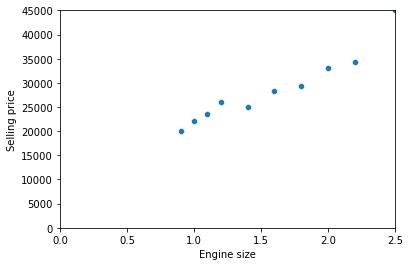

In [5]:
# Start with a visualisation BEFORE running linear regression.
sns.scatterplot(data=df,
               x='Engine size',
               y='Selling price')

# Set axis values.
plt.ylim(0, 45000)
plt.xlim(0, 2.5)

In [7]:
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# See if we can predict the selling price based on the engine size
reg = np.polyfit(df['Engine size'],
                df['Selling price'],
                # Degree = 1, degree of polynomium, for SLR always 1.
                deg = 1)

# The output indicates the slope and -intercept respectively.
reg

array([12909.48891394,  8362.60240511])

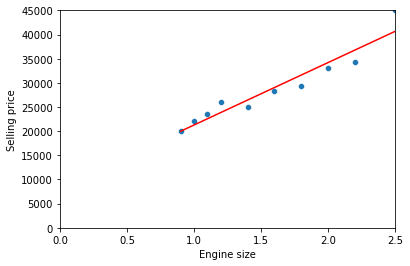

In [8]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, df['Engine size'])

# View the previous scatterplot.
sns.scatterplot(data=df,
               x='Engine size',
               y='Selling price')

# Set axis values.
plt.ylim(0, 45000)
plt.xlim(0, 2.5)

# Add the trendline.
plt.plot(df['Engine size'],
         trend,
         color='red')

# SLR: OLS Method

In [10]:
# Install the statsmodels package.
!pip install statsmodels

# Import the necessary libraries
import numpy as np
import pandas as pd

# Visualisation.
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels.
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Import and read the data file (car4u.csv).
cars = pd.read_csv('car4u.csv')

# View the DataFrame.
print(cars.head())
print(cars.info())
cars.describe()

   Engine size  Selling price
0           77      79.775152
1           21      23.177279
2           22      25.609262
3           20      17.857388
4           36      41.849864
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Engine size    300 non-null    int64  
 1   Selling price  300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
None


,Engine size,Selling price
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


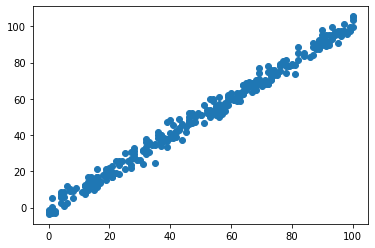

In [11]:
# Define the dependent variable.
y = cars['Selling price'] 

# Define the independent variable.
x = cars['Engine size'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [12]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = cars).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Thu, 03 Nov 2022   Prob (F-statistic):          1.33e-294
Time:                        17:11:10   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -0.461811
x            1.014335
dtype: float64
Standard errors:  Intercept    0.359560
x            0.006162
dtype: float64
Predicted values:  [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  6

In [14]:
# Create the linear regression model.
# Set the the coefficient to 1.0143 and the constant to -0.4618.
y_pred = (-0.4618) + 1.0143 * cars['Engine size']

# View the output
y_pred

0      77.6393
1      20.8385
2      21.8528
3      19.8242
4      36.0530
        ...   
295    71.5535
296    46.1960
297    55.3247
298    62.4248
299    47.2103
Name: Engine size, Length: 300, dtype: float64

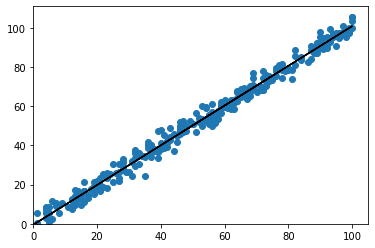

In [15]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

# 1.2.6 SLR: Scikit-learn

In [17]:
# Install the necessary module.
!pip install scipy

# Import the necessary libraries, packages, and modules.
# Data analysis:
import numpy as np  
import pandas as pd 

# Linear regression:
import sklearn
import statsmodels.api as sm 

#Visualisation:
import matplotlib.pyplot as plt 
import seaborn as sns


# Import the salary_data.csv file.
data = pd.read_csv('salary_data.csv') 

# Print the DataFrame.
print(data.head())
print(data.info())
data.describe() 

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [18]:
# Define the dependent variable.
y = data['Salary'].values.reshape(-1, 1) 

# Define the independent variable.
x = data['YearsExperience'].values.reshape(-1, 1) 

In [19]:
# Import the necessary package.
from sklearn.linear_model import LinearRegression

# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

In [20]:
# Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.5,
                                                    random_state=100)

In [21]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output
y_pred

array([[ 38077.15121656],
       [ 81546.97789525],
       [ 68317.03064522],
       [ 82491.9741274 ],
       [ 92886.932681  ],
       [ 39967.14368085],
       [ 90051.94398456],
       [ 62647.05325234],
       [ 73987.00803809],
       [ 72097.0155738 ],
       [103281.8912346 ],
       [ 56032.07962732],
       [ 44692.12484158],
       [108006.87239533],
       [ 56032.07962732]])

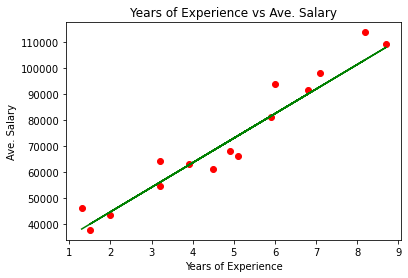

In [22]:
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show() 

In [23]:
# Print R-squared value of the test data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.9311257752883872
Intercept value:  [25792.20019867]
Coefficient value:  [[9449.96232146]]


# Testing the model

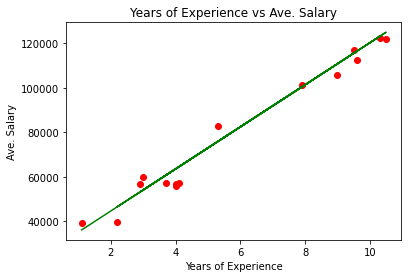

In [24]:
# Predict the test set values.
y_pred_test = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show() 

In [25]:
# Print R-squared value of the test data.
print("R-squared value: ", lm.score(x_test, y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.9714787358591477
Intercept value:  [25792.20019867]
Coefficient value:  [[9449.96232146]]


In [26]:
# Use the predict() method with an array to call the 
# salaries for each number of years’ experience.
predictedSalary = lm.predict([[5], [10], [15], [20], [25], [30]])  

# Print the results.
print(f"Predicted Salary:\n{predictedSalary}") 

Predicted Salary:
[[ 73042.01180594]
 [120291.82341322]
 [167541.63502049]
 [214791.44662777]
 [262041.25823505]
 [309291.06984232]]


In [27]:
# Use the predict() method with an array to call the 
# salaries for each number of years’ experience.
predictedSalary = lm.predict([[35], [40], [45], [50]])  

# Print the results.
print(f"Predicted Salary:\n{predictedSalary}") 

Predicted Salary:
[[356540.8814496 ]
 [403790.69305687]
 [451040.50466415]
 [498290.31627142]]
